<a href="https://colab.research.google.com/github/RodrigoLima82/bootcamp_igti_machine_learning/blob/master/Modulo_04/Desafio/Desafio_04_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio - IGTI - Modulo 04 - Flowers Photo
- Autor: Rodrigo de Lima Oliveira
- Data : 25/06/2020
- LinkedIn: https://www.linkedin.com/in/rodrigolima82/

## Descrição do Problema

O objetivo desse desafio é classificar imagens pelo uso do Deep Learning (Keras e Tensorflow). Dessa vez iremos utilizar dados de imagens de flores para ensinar à rede as novas classes que precisará reconhecer. Vamos usar um arquivo de fotos de flores licenciadas da creative-commons do Google. O conjunto de dados usado neste exemplo é distribuído como diretórios de imagens, com uma classe de imagem por diretório.

Você precisará trabalhar nas seguintes etapas:

- Explorar os dados.
- Pré-processar os dados.
- Construir o modelo.
- Montar as camadas.
- Compilar o modelo.
- Treinar o modelo.
- Avaliar a acurácia.
- Fazer predições.

Ao final, o modelo estará treinado para reconhecer imagens de flores conforme as classes abaixo:

![title](https://github.com/RodrigoLima82/bootcamp_igti_machine_learning/blob/master/Modulo_04/Desafio/flowers.png?raw=1)


## Carregando as bibliotecas

In [1]:
!pip install -q efficientnet

In [1]:
# Imports de avisos
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulacao de dados
import os
import pandas as pd
import numpy as np

# Import para visualizacao dos dados
import matplotlib.pyplot as plt
from matplotlib import pyplot
import IPython.display as display
from PIL import Image

# Imports de bibliotecas para treinamento de redes neurais
import math, re, os
import tensorflow as tf
import numpy as np
import efficientnet.tfkeras as efn
from matplotlib import pyplot as plt
#from kaggle_datasets import KaggleDatasets
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

print("Tensorflow version " + tf.__version__)
AUTO = tf.data.experimental.AUTOTUNE


Tensorflow version 2.2.0


In [2]:
# Verifica qual o harware está usando (TPU, GPU ou CPU)
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


In [3]:
!pip install -q watermark
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Desafio - Modulo 04 - Rodrigo" --iversions

PIL.Image  7.0.0
matplotlib 3.2.2
pandas     1.0.5
tensorflow 2.2.0
numpy      1.18.5
re         2.2.1
Desafio - Modulo 04 - Rodrigo


## Carregando dataset de imagens de Flores

In [10]:
# Carregando dataset
import pathlib
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', fname='flower_photos', untar=True)
data_dir = pathlib.Path(data_dir)

# Verificando quantas imagens tem nos diretórios
image_count = len(list(data_dir.glob('*/*.jpg')))
print('Quantidade de Imagens: ', image_count)

# Verificando todas as classes de flores (licenciadas)
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENCE.txt"])
print('Classes: ', CLASS_NAMES)

Quantidade de Imagens:  3670
Classes:  ['tulips' 'sunflowers' 'dandelion' 'roses' 'daisy' 'LICENSE.txt']


## Visualizando algumas fotos de flores

In [11]:
tulips     = list(data_dir.glob('tulips/*'))
sunflowers = list(data_dir.glob('sunflowers/*'))
dandelion  = list(data_dir.glob('dandelion/*'))
roses      = list(data_dir.glob('roses/*'))
daisy      = list(data_dir.glob('daisy/*'))

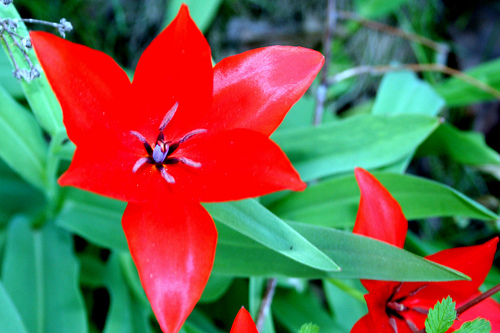

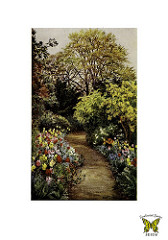

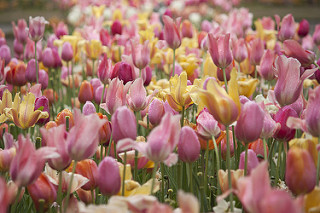

In [12]:
# Visualizando fotos de TULIPAS
for image_path in tulips[:3]:
  display.display(Image.open(str(image_path)))

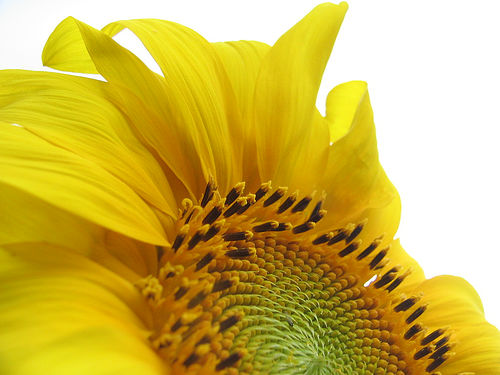

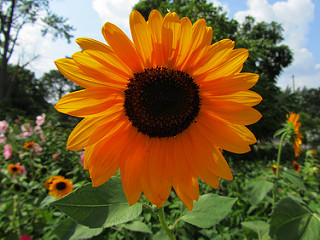

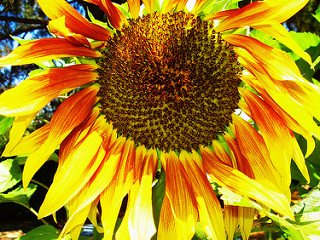

In [13]:
# Visualizando fotos de GIRASOL
for image_path in sunflowers[:3]:
  display.display(Image.open(str(image_path)))